<a href="https://colab.research.google.com/github/M-Isaiah/Machine_L_R/blob/main/BOD_DATA_VISUALIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from google.colab import files 
import io
from google.colab import drive


In [92]:
bod=pd.read_csv('https://raw.githubusercontent.com/M-Isaiah/Machine_L_R/main/bod.csv')

In [93]:
bod.head(500)

,STATION CODE,LOCATIONS,STATE,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,1312,"GODAVARI AT JAYAKWADI DAM, AURNAGABAD,MAHARASHTRA",MAHARASHTRA,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0
1,2177,GODAVARI RIVER NEAR SOMESHWAR TEMPLE.,MAHARASHTRA,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0
2,2182,GODAVARI RIVER AT SAIKHEDA.,MAHARASHTRA,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0
3,2179,"GODAVARI RIVER AT HANUMAN GHAT, NASHIK CITY.",MAHARASHTRA,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0
4,2183,GODAVARI RIVER AT NANDUR- MADMESHWAR DAM.,MAHARASHTRA,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0
...,...,...,...,...,...,...,...,...,...,...,...
495,2077,MOTICHER LAKE NEAR KAKAARPAR ATOMIC POWER STAT...,GUJARAT,28.4,3.5,8.1,NaN,9.5,0.00,NaN,313.0
496,2078,"KUWADAVA LAKE,VILL KUWADAVA,DIST.RAJKOT",GUJARAT,26.0,5.0,7.6,NaN,8.0,0.00,NaN,200.0
497,3198,"GOMTI LAKE,OPP,RANCHODAJI TEMPLE,DAKOR,KHEDA",GUJARAT,28.0,4.4,8.0,NaN,1.7,0.00,NaN,NaN
498,1979,"OLPAD, VILLAGE POND OLPAD, SURAT",GUJARAT,29.0,5.9,7.8,1453.0,7.3,6.45,30.0,7.0


In [94]:
bod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   STATION CODE         534 non-null    int64  
 1   LOCATIONS            534 non-null    object 
 2   STATE                534 non-null    object 
 3   TEMP                 529 non-null    float64
 4   DO                   532 non-null    float64
 5   pH                   534 non-null    float64
 6   CONDUCTIVITY         504 non-null    float64
 7   BOD                  528 non-null    float64
 8   NITRATE_N_NITRITE_N  532 non-null    float64
 9   FECAL_COLIFORM       452 non-null    float64
 10  TOTAL_COLIFORM       495 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 46.0+ KB


From the above information, it is apparent that a few data is missing

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

**DATA PREPROCESSING**
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [95]:
#In this section, we drop off the columns which are not of interest and generate a new data frame: bod1, which has the missing values imputed
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
bod.drop(['STATION CODE','LOCATIONS','STATE'],axis=1,inplace=True)
bod1=pd.DataFrame(imputer.fit_transform(bod),columns=bod.columns)

In [96]:
bod1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TEMP                 534 non-null    float64
 1   DO                   534 non-null    float64
 2   pH                   534 non-null    float64
 3   CONDUCTIVITY         534 non-null    float64
 4   BOD                  534 non-null    float64
 5   NITRATE_N_NITRITE_N  534 non-null    float64
 6   FECAL_COLIFORM       534 non-null    float64
 7   TOTAL_COLIFORM       534 non-null    float64
dtypes: float64(8)
memory usage: 33.5 KB


In [97]:
bod1

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0
1,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0
2,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0
3,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0
4,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0
...,...,...,...,...,...,...,...,...
529,23.2,4.4,8.1,538.0,1.2,1.00,5.0,14.0
530,22.9,5.6,8.4,591.0,1.1,3.00,4.0,8.0
531,22.9,5.8,8.5,588.0,1.2,3.00,4.0,6.0
532,28.7,4.1,7.9,1133.0,2.3,2.00,7.0,67.0


In the above information therefore, the dataset is complete, with all the missing values filled with a '0' value

**%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%**%

**PRINCIPAL COMPONENT ANALYSIS PCA**


**%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%**

In [98]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(bod1)
StandardScaler(copy=True,with_mean=True, with_std=True)
scaled_data=scaler.transform(bod1)


In [99]:
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)

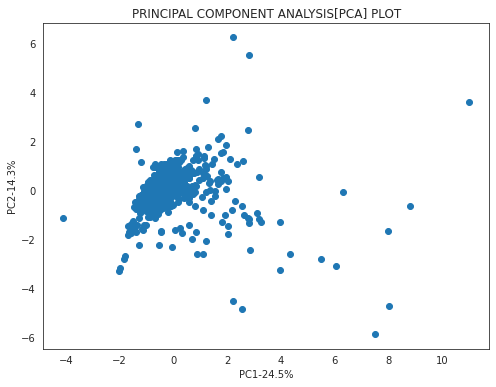

In [100]:
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('PC1-{0}%'.format(per_var[0]))
plt.ylabel('PC2-{0}%'.format(per_var[1]));
plt.title('PRINCIPAL COMPONENT ANALYSIS[PCA] PLOT');

From the PCA Plot above there is barely any unique data clusters, the data seems to all fall into one cluster .The unique clusters are barely different from each other and seems to fall in the same category. It is clear that the data are correlated well and linear regression model can be used to do the machine learning. The first and second principle components take 

In [101]:
pca.explained_variance_ratio_

array([0.24486761, 0.14291644, 0.12746046, 0.12178688, 0.11799686])

In [102]:
pca.explained_variance_

array([1.9626162 , 1.14547659, 1.02159679, 0.97612299, 0.94574595])

**%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%**%

**T-DISTRIBUTED STOCHASTIC NEIGHBOUR EMBEDDING(TSNE)**


**%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%**

In [103]:
#In this section, we scale down all the values in all the columns to range from 0 to 1, for purpose of TSNE plot in the next section
column_names=['TEMP','DO','pH','CONDUCTIVITY','BOD','NITRATE_N_NITRITE_N','FECAL_COLIFORM','TOTAL_COLIFORM']
data_values=bod1[column_names]
data_values_n=(data_values-data_values.min())/(data_values.max()-data_values.min())

In [104]:
data_values_n

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,0.802575,0.392638,0.214286,0.028972,0.042440,0.043956,0.000010,3.023093e-06
1,0.600858,0.368098,0.202381,0.009616,0.038462,0.043956,0.000232,7.599720e-06
2,0.656652,0.337423,0.178571,0.013154,0.053050,0.197802,0.000190,5.542337e-06
3,0.613734,0.337423,0.178571,0.013820,0.071618,0.078022,0.000290,1.184045e-05
4,0.652361,0.349693,0.190476,0.010615,0.039788,0.059121,0.000145,5.500350e-06
...,...,...,...,...,...,...,...,...
529,0.545064,0.269939,0.214286,0.020772,0.013263,0.021978,0.000016,5.458363e-07
530,0.532189,0.343558,0.250000,0.022978,0.011936,0.065934,0.000013,2.939118e-07
531,0.532189,0.355828,0.261905,0.022853,0.013263,0.065934,0.000013,2.099370e-07
532,0.781116,0.251534,0.190476,0.045540,0.027851,0.043956,0.000023,2.771169e-06


In [105]:
#iN THIS SECTION, WE CARRY OUT TSNE OPERATION, BY FITTING THE DATA VALUES ABOVE INTO TSNE MODEL, 2D MODEL
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2, random_state=0)
x_bod_2d=tsne.fit_transform(data_values_n)
#We also add this generate set to new columns , named x and y in the bod1 data set
bod1['x']=x_bod_2d[:,0]
bod1['y']=x_bod_2d[:,1]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [106]:
#This is the 2D data values which can now be ploted on a TSNE plot
x_bod_2d

array([[ -6.283552  ,  27.1292    ],
       [  5.0744762 ,  -3.6233146 ],
       [ -5.600956  ,  -1.0399649 ],
       ...,
       [ 10.071879  ,  -7.0612316 ],
       [-11.513641  ,  23.107111  ],
       [  9.960202  ,  -0.75303626]], dtype=float32)

In [107]:
#bod1 now has new look as below, with all the data projected to the x and y by tsne function as shown. 
bod1

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,x,y
0,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0,-6.283552,27.129200
1,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0,5.074476,-3.623315
2,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0,-5.600956,-1.039965
3,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0,3.228205,-2.994065
4,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0,3.823782,-0.968437
...,...,...,...,...,...,...,...,...,...,...
529,23.2,4.4,8.1,538.0,1.2,1.00,5.0,14.0,9.340674,-3.318341
530,22.9,5.6,8.4,591.0,1.1,3.00,4.0,8.0,10.252775,-6.936781
531,22.9,5.8,8.5,588.0,1.2,3.00,4.0,6.0,10.071879,-7.061232
532,28.7,4.1,7.9,1133.0,2.3,2.00,7.0,67.0,-11.513641,23.107111


In [108]:
# Determination of the number of clusters on which the data can be claustered. This has been done by Kmeans function through iteration 10 times
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(bod1[['TEMP','pH','DO','CONDUCTIVITY','BOD','NITRATE_N_NITRITE_N','FECAL_COLIFORM','TOTAL_COLIFORM']])
    sse.append(km.inertia_)
    

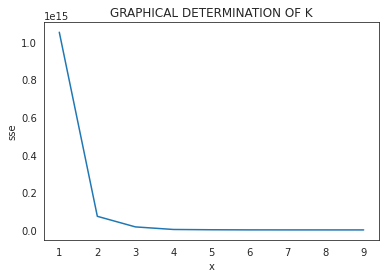

In [109]:
#Plot for the determination of the K, the number of clusters
plt.xlabel('x')
plt.ylabel('sse')
plt.plot(k_rng,sse)
plt.title('GRAPHICAL DETERMINATION OF K');

From the graph, it is clear that the data can be appropriately clustered into two groups as th value of k=2

In [110]:
#Clustering of the actual data
km=KMeans(n_clusters=2)
y_predicted=km.fit_predict(bod1[['TEMP','pH','DO','CONDUCTIVITY','BOD','NITRATE_N_NITRITE_N','FECAL_COLIFORM','TOTAL_COLIFORM']])
bod1['Cluster']=y_predicted

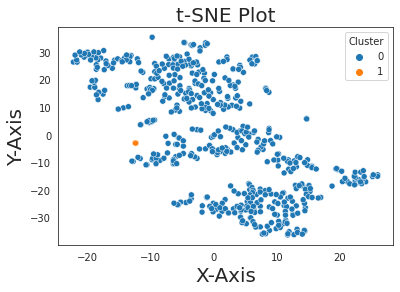

In [111]:
# Ploting TSNE PLOT
sns.scatterplot(x='x',y='y', hue='Cluster',data=bod1);
sns.set_style("darkgrid");
plt.xlabel("X-Axis",fontsize=20);
plt.ylabel("Y-Axis",fontsize=20);
plt.title("t-SNE Plot", fontsize=20);

**%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%**

**DETERMINATION OF THE PEARSON CORRELATION**



**%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%**

In [112]:
#In this section, we determine the Perason Correlation, to inform us on whether there are associations between the sets of the data in relation to BOD
bod_corr_data=bod1[['TEMP','pH','DO','CONDUCTIVITY','BOD','NITRATE_N_NITRITE_N','FECAL_COLIFORM','TOTAL_COLIFORM']]
correlation = bod_corr_data.corr()
correlation

,TEMP,pH,DO,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
TEMP,1.000000,0.017788,-0.184776,0.074336,-0.070524,0.088759,0.003681,-0.003061
pH,0.017788,1.000000,0.065572,0.011634,-0.055822,-0.018706,-0.013119,-0.029936
DO,-0.184776,0.065572,1.000000,-0.104975,-0.522361,-0.269114,-0.079518,-0.229604
CONDUCTIVITY,0.074336,0.011634,-0.104975,1.000000,0.098962,0.083578,-0.000954,0.001295
BOD,-0.070524,-0.055822,-0.522361,0.098962,1.000000,0.285053,0.299224,0.173900
NITRATE_N_NITRITE_N,0.088759,-0.018706,-0.269114,0.083578,0.285053,1.000000,0.018370,0.130735
FECAL_COLIFORM,0.003681,-0.013119,-0.079518,-0.000954,0.299224,0.018370,1.000000,0.036039
TOTAL_COLIFORM,-0.003061,-0.029936,-0.229604,0.001295,0.173900,0.130735,0.036039,1.000000


In [113]:
parameters={'Temp':-0.07,'pH':-0.06,'DO':-0.52,'Conductivity':0.10,'Nitrate_N_Nitrite':0.29,'F.Coliforms':0.30,'T.Coliforms':0.17}
remarks={'Temp':"Small Negative",'pH':"Small Negative",'DO':"High Negative",'Conductivity':"Small Posivtive",'Nitrate_N_Nitrite':"Medium Positive",'F.Coliforms':"Medium Positive",'T.Coliforms':"Small Positive"}

In [114]:
pearson_corr=pd.DataFrame({'Parameters':parameters,'Corr_Strength':remarks})

In [115]:
#Pearon Corrrelation with respect to BOD[Biochemical Oxygen Demand]
pearson_corr.T

,Temp,pH,DO,Conductivity,Nitrate_N_Nitrite,F.Coliforms,T.Coliforms
Parameters,-0.07,-0.06,-0.52,0.1,0.29,0.3,0.17
Corr_Strength,Small Negative,Small Negative,High Negative,Small Posivtive,Medium Positive,Medium Positive,Small Positive


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

**MACHINE LEARNING USING THE LINEAR MULTIVARIATE REGRESSION MODEL**

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [116]:
bod.describe()

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
count,529.000000,532.000000,534.000000,504.00000,528.000000,532.000000,452.000000,4.950000e+02
mean,25.241399,6.389812,7.798127,684.97619,5.339773,1.378571,7384.170354,1.243970e+05
std,3.448013,1.622862,0.649950,1769.32976,8.500504,2.803948,30714.059635,1.458408e+06
min,10.500000,0.000000,6.300000,39.00000,0.200000,0.000000,0.000000,1.000000e+00
25%,23.300000,5.575000,7.500000,269.75000,1.600000,0.100000,21.750000,1.285000e+02
50%,25.500000,6.700000,7.900000,377.50000,2.700000,0.600000,405.000000,1.250000e+03
75%,27.600000,7.425000,8.100000,578.50000,5.100000,1.700000,2132.500000,4.919000e+03
max,33.800000,16.300000,14.700000,24062.00000,75.600000,45.500000,310417.000000,2.381667e+07


In [117]:
bod1.describe()

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,x,y,Cluster
count,534.000000,534.000000,534.000000,534.00000,534.000000,534.000000,534.000000,5.340000e+02,534.000000,534.000000,534.000000
mean,25.241399,6.389812,7.798127,684.97619,5.339773,1.378571,7384.170354,1.243970e+05,0.765941,-0.178109,0.005618
std,3.431802,1.619814,0.649950,1718.81514,8.452523,2.798682,28252.825661,1.404038e+06,10.504290,20.381947,0.074812
min,10.500000,0.000000,6.300000,39.00000,0.200000,0.000000,0.000000,1.000000e+00,-22.227568,-36.334721,0.000000
25%,23.300000,5.600000,7.500000,273.00000,1.600000,0.100000,39.000000,1.400000e+02,-6.274283,-19.002218,0.000000
50%,25.400000,6.700000,7.900000,389.00000,2.700000,0.600000,756.000000,1.450000e+03,0.798700,-0.937321,0.000000
75%,27.600000,7.400000,8.100000,656.00000,5.200000,1.700000,6509.750000,7.544500e+03,8.144870,17.820930,0.000000
max,33.800000,16.300000,14.700000,24062.00000,75.600000,45.500000,310417.000000,2.381667e+07,25.973778,35.385609,1.000000


In [118]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import math

In [119]:
reg=linear_model.LinearRegression()
acc=0
for i in range(10000):
      x_train, x_test,y_train,y_test=train_test_split(bod1[['DO','NITRATE_N_NITRITE_N','FECAL_COLIFORM','TOTAL_COLIFORM']],bod1.BOD,test_size=0.10)
      reg.fit(x_train,y_train)
      N_acc=reg.score(x_test,y_test)
      while N_acc>acc:
        acc=N_acc
        print(acc,reg.coef_,reg.intercept_)
print(acc,reg.coef_,reg.intercept_)

0.49775306082698223 [-2.17499587e+00  5.36070836e-01  5.91895462e-05 -1.57890712e-07] 17.92227814602121
0.5238275431731619 [-2.15397689e+00  5.11825762e-01  8.20665455e-05  2.90470412e-07] 17.57193657141474
0.6497439186294637 [-2.45057461e+00  5.08060449e-01  7.60088290e-05  2.04017410e-07] 19.79659804450144
0.7375829123438153 [-2.39546089e+00  4.41244301e-01  7.09632220e-05  2.41310229e-07] 19.4935553051564
0.7440674831481295 [-2.40273692e+00  5.08075728e-01  7.81939818e-05  2.20663122e-07] 19.400760514921927
0.7885713967887265 [-2.40419837e+00  4.56909386e-01  7.68830232e-05  2.36813416e-07] 19.444545809377157
0.821133959296753 [-2.38976010e+00  4.69260506e-01  7.71753842e-05  2.34646560e-07] 19.37346265698412
0.821133959296753 [-2.07060948e+00  5.18584301e-01  9.31142233e-05  3.03160413e-07] 17.115673849464216


In [120]:
reg.coef_

array([-2.07060948e+00,  5.18584301e-01,  9.31142233e-05,  3.03160413e-07])

In [121]:
x_train.shape

(480, 4)

In [122]:
reg.intercept_

17.115673849464216

In [123]:
bod1['Predicted']=reg.predict(bod1[['DO','NITRATE_N_NITRITE_N','FECAL_COLIFORM','TOTAL_COLIFORM']])
bod1['Difference']=bod1.BOD-bod1.Predicted

In [124]:
print(bod1[['BOD','Predicted','Difference']].to_markdown());
#print(bod1.to_markdown());

|     |      BOD |   Predicted |   Difference |
|----:|---------:|------------:|-------------:|
|   0 |  3.4     |   4.90124   |  -1.50124    |
|   1 |  3.1     |   5.73594   |  -2.63594    |
|   2 |  4.2     |  10.4001    |  -6.20011    |
|   3 |  5.6     |   7.57676   |  -1.97676    |
|   4 |  3.2     |   6.71242   |  -3.51242    |
|   5 | 12.6     |   9.00297   |   3.59703    |
|   6 | 10.3     |   7.34528   |   2.95472    |
|   7 |  3.8     |   6.04918   |  -2.24918    |
|   8 |  5.2     |   7.13362   |  -1.93362    |
|   9 |  2.5     |   4.69077   |  -2.19077    |
|  10 |  3.5     |   5.18563   |  -1.68563    |
|  11 |  4.7     |   4.79743   |  -0.0974345  |
|  12 |  4.2     |   7.85634   |  -3.65634    |
|  13 |  4       |   5.16082   |  -1.16082    |
|  14 |  4.7     |   5.99242   |  -1.29242    |
|  15 |  3.6     |   4.79753   |  -1.19753    |
|  16 |  3.2     |   6.95031   |  -3.75031    |
|  17 |  1.7     |   6.24847   |  -4.54847    |
|  18 | 12       |   2.84066   |   9.159

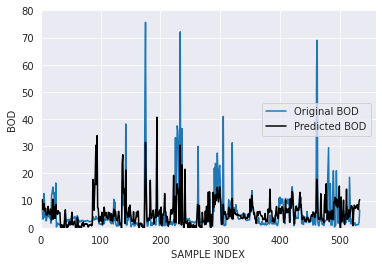

In [125]:
plt.plot(bod1['BOD'],label='Original BOD')
plt.plot(bod1['Predicted'],label='Predicted BOD',color='black');
plt.xlabel('SAMPLE INDEX');
plt.ylabel('BOD');
plt.xlim(0,None);
plt.ylim(0,80)
plt.legend();

In [126]:
from sklearn.metrics import mean_squared_error 
mse = mean_squared_error(bod1.BOD, bod1.Predicted)
rmse = mean_squared_error(bod1.BOD,bod1.Predicted, squared = False)
print("The MSE is:", mse ,"and the RMSE is:",rmse)

The MSE is: 45.708564226139764 and the RMSE is: 6.76081091483409


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(60, 5, '0.36')

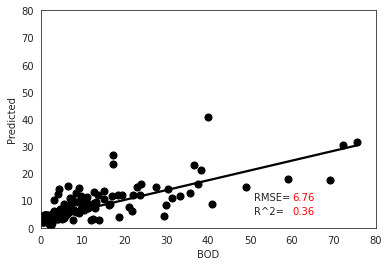

In [127]:
sns.set_style('white');
sns.regplot(bod1['BOD'],bod1['Predicted'],ci=None,x_jitter=0.1,y_jitter=0.1,x_estimator=np.mean,robust=True,color='black');
plt.ylim(0,80);
plt.xlim(0,80);
plt.text(51,10,'RMSE=')
plt.text(60,10,round(rmse,2),color='red')
plt.text(51,5,'R^2=')
plt.text(60,5,round(R2,2),color='red')

In [128]:
from sklearn.metrics import r2_score

In [129]:
R2=r2_score(bod1.BOD,bod1.Predicted)
R2

0.35902826720260406



***BEST RESULTS WITH TEST DATA OF 10%**

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

0.8451048549567592 [-2.39946690e+00  4.22648524e-01  4.90292179e-05 -2.77772272e-07] 19.526678821617452
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%



**BEST RESULTS WITH TEST DATA OF 20%**

0.6795249998599242 [-1.97823918e+00  6.01791334e-01  8.54165410e-05  2.99518531e-07] 16.593190573526176

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

PREDICTION WITH ONLY DO AND TOTAL COLIFORMS: BEST MODEL

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

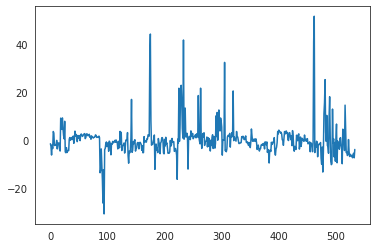

In [130]:
plt.plot(bod1['Difference'],label='Difference')